In [1]:
# Import different libraries

import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import uuid
import time
import calendar

# Create a data set of 2m rows

In [2]:
# Create Dataset

df = pd.DataFrame(np.random.randint(200, size=(2000000)), columns= ['QTY'])
df['UID'] = [uuid.uuid4().hex.upper()[:16] for _ in range(len(df.index))]
df['SKU'] = 'SKU' + '-'+ df['UID']
df['COGS'] = np.random.randint(200, size= (2000000))
df['Total COGS'] = df['QTY'] * df['COGS']

df.head()

,QTY,UID,SKU,COGS,Total COGS
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144


# Create Country code

In [3]:
df['Country code'] = random.randint(1,8, size=(2000000))
df.head()

,QTY,UID,SKU,COGS,Total COGS,Country code
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812,5
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560,5
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0,2
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990,2
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144,3


# Create Country name

In [4]:
def a(df):
    if df['Country code'] == 1:
        val = 'Spain'
    elif df['Country code'] == 2:
        val = 'Italy'
    elif df['Country code'] == 3:
        val = 'Germany'
    elif df['Country code'] == 4:
        val = 'England'
    elif df['Country code'] == 5:
        val = 'France'
    elif df['Country code'] == 6:
        val = 'Portugal'
    elif df['Country code'] == 7:
        val = 'Poland'
    else:
        val = 'Holland'
    return val

df['Country Name'] = df.apply(a, axis=1)

In [5]:
df.head(10)

,QTY,UID,SKU,COGS,Total COGS,Country code,Country Name
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812,5,France
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560,5,France
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0,2,Italy
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990,2,Italy
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144,3,Germany
5,1,F3D69035D4F043E6,SKU-F3D69035D4F043E6,56,56,6,Portugal
6,39,47CCDCB5206E4038,SKU-47CCDCB5206E4038,94,3666,5,France
7,125,EB7669414F274629,SKU-EB7669414F274629,168,21000,4,England
8,169,46E0F21F3A5E4CFB,SKU-46E0F21F3A5E4CFB,137,23153,6,Portugal
9,25,701052874C804B2E,SKU-701052874C804B2E,144,3600,1,Spain


# Create Delivery note

In [6]:
df['Delivery note'] = np.random.randint(10000, size=(2000000))
df.head()

,QTY,UID,SKU,COGS,Total COGS,Country code,Country Name,Delivery note
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812,5,France,5461
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560,5,France,9564
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0,2,Italy,6937
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990,2,Italy,7984
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144,3,Germany,2964


# Create items category

In [7]:
def a(df):
    if df['Delivery note']  >= 0 and df['Delivery note']  <=2000:
        val = 'Fashion'
    elif df['Delivery note']  > 2000 and df['Delivery note'] <=4000:
        val = 'Electronics'
    elif df['Delivery note']  > 4000 and df['Delivery note'] <=6000:
        val = 'Phones'
    elif df['Delivery note']  > 6000 and df['Delivery note'] <=8000:
        val = 'Furnitures'
    else:
        val = 'Computing'
    return val

df['Category'] = df.apply(a, axis=1)
df.head()

,QTY,UID,SKU,COGS,Total COGS,Country code,Country Name,Delivery note,Category
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812,5,France,5461,Phones
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560,5,France,9564,Computing
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0,2,Italy,6937,Furnitures
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990,2,Italy,7984,Furnitures
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144,3,Germany,2964,Electronics


# Create Serial number for the data

In [8]:
df['Serial number'] = range (1, 2000001)
df.head()

,QTY,UID,SKU,COGS,Total COGS,Country code,Country Name,Delivery note,Category,Serial number
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812,5,France,5461,Phones,1
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560,5,France,9564,Computing,2
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0,2,Italy,6937,Furnitures,3
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990,2,Italy,7984,Furnitures,4
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144,3,Germany,2964,Electronics,5


# Create Delivery date for the items

In [9]:
def random_dates(start, end, n, unit='D', seed=None):
    if not seed:
        np.random.seed(0)

    ndays = (end - start).days + 1
    return start + pd.to_timedelta(np.random.randint(0, ndays, n), unit=unit)

start = pd.to_datetime('2022-01-01')
end = pd.to_datetime('2022-12-01')

df['Delivery_date'] = random_dates(start, end, 2000000)
df.head()

,QTY,UID,SKU,COGS,Total COGS,Country code,Country Name,Delivery note,Category,Serial number,Delivery_date
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812,5,France,5461,Phones,1,2022-06-22
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560,5,France,9564,Computing,2,2022-02-17
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0,2,Italy,6937,Furnitures,3,2022-04-28
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990,2,Italy,7984,Furnitures,4,2022-07-12
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144,3,Germany,2964,Electronics,5,2022-11-20


# Create the Delivery month

In [10]:
df['Delivery_month'] = df['Delivery_date'].dt.to_period('M')
df.head()

,QTY,UID,SKU,COGS,Total COGS,Country code,Country Name,Delivery note,Category,Serial number,Delivery_date,Delivery_month
0,84,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,93,7812,5,France,5461,Phones,1,2022-06-22,2022-06
1,70,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,8,560,5,France,9564,Computing,2,2022-02-17,2022-02
2,0,50A34B31449A49E7,SKU-50A34B31449A49E7,94,0,2,Italy,6937,Furnitures,3,2022-04-28,2022-04
3,42,CA00900FA96A46E0,SKU-CA00900FA96A46E0,95,3990,2,Italy,7984,Furnitures,4,2022-07-12,2022-07
4,88,80AC372318D347CD,SKU-80AC372318D347CD,13,1144,3,Germany,2964,Electronics,5,2022-11-20,2022-11


# Arrange the dataset

In [17]:
df_arranged = df[['Serial number','Delivery_date', 'Delivery_month','UID','SKU','Delivery note', 'Category','QTY','COGS',
                  'Total COGS','Country Name']]
df_arranged.head()

,Serial number,Delivery_date,Delivery_month,UID,SKU,Delivery note,Category,QTY,COGS,Total COGS,Country Name
0,1,2022-06-22,2022-06,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,5461,Phones,84,93,7812,France
1,2,2022-02-17,2022-02,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,9564,Computing,70,8,560,France
2,3,2022-04-28,2022-04,50A34B31449A49E7,SKU-50A34B31449A49E7,6937,Furnitures,0,94,0,Italy
3,4,2022-07-12,2022-07,CA00900FA96A46E0,SKU-CA00900FA96A46E0,7984,Furnitures,42,95,3990,Italy
4,5,2022-11-20,2022-11,80AC372318D347CD,SKU-80AC372318D347CD,2964,Electronics,88,13,1144,Germany


# Set the Serial number column as index

In [12]:
df_arranged.set_index('Serial number').head()

,Delivery_date,Delivery_month,UID,SKU,Delivery note,Category,QTY,COGS,Total COGS,Country Name
Serial number,,,,,,,,,,
1,2022-06-22,2022-06,27511AAFC2D24E3E,SKU-27511AAFC2D24E3E,5461,Phones,84,93,7812,France
2,2022-02-17,2022-02,8A3860D82AC84D5F,SKU-8A3860D82AC84D5F,9564,Computing,70,8,560,France
3,2022-04-28,2022-04,50A34B31449A49E7,SKU-50A34B31449A49E7,6937,Furnitures,0,94,0,Italy
4,2022-07-12,2022-07,CA00900FA96A46E0,SKU-CA00900FA96A46E0,7984,Furnitures,42,95,3990,Italy
5,2022-11-20,2022-11,80AC372318D347CD,SKU-80AC372318D347CD,2964,Electronics,88,13,1144,Germany


In [13]:
# Get the total inventory count for each country per category

In [18]:
inventory_count = df_arranged.pivot_table(index=['Category'], columns=['Country Name'], values=['QTY'],
                  aggfunc='count')
inventory_count

QTY                                             
Country Name England France Germany  Italy Poland Portugal  Spain
Category                                                         
Computing      57229  57619   57081  56541  57140    57361  57389
Electronics    57030  56959   57402  56961  57285    57380  57387
Fashion        57060  57342   56873  56838  56800    56982  57242
Furnitures     57029  56968   57363  57226  57292    57239  57037
Phones         57277  57045   57276  57128  57155    56981  57083

# Get the total inventory value for each country per category

In [19]:
inventory_value = df_arranged.pivot_table(index=['Category'], columns=['Country Name'], values=['Total COGS'],
                  aggfunc='sum')
inventory_value

Total COGS                                              \
Country Name    England     France    Germany      Italy     Poland   
Category                                                              
Computing     563511797  569380720  566525091  557039679  567819142   
Electronics   562023166  561982684  567463063  565824106  563671101   
Fashion       570349626  568167582  561521481  562897908  564499811   
Furnitures    567662175  566684141  570982598  562677621  568694937   
Phones        564715781  565503193  565126857  561885144  563504995   

                                    
Country Name   Portugal      Spain  
Category                            
Computing     565793528  571287982  
Electronics   567186501  565885609  
Fashion       567486351  567481780  
Furnitures    567317203  564098718  
Phones        564521483  565633919

# Get the group inventory balance at the end of each month

In [16]:
inventory_balance = df_arranged.groupby(['Delivery_month']).agg({'QTY': 'count', 'Total COGS': 'sum'})
inventory_balance

,QTY,Total COGS
Delivery_month,,
2022-01,185495,1839503890
2022-02,166762,1651864936
2022-03,185166,1831011327
2022-04,179097,1769384304
2022-05,184806,1833243769
2022-06,179793,1776728522
2022-07,184015,1823865974
2022-08,185951,1834856867
2022-09,179528,1773728647


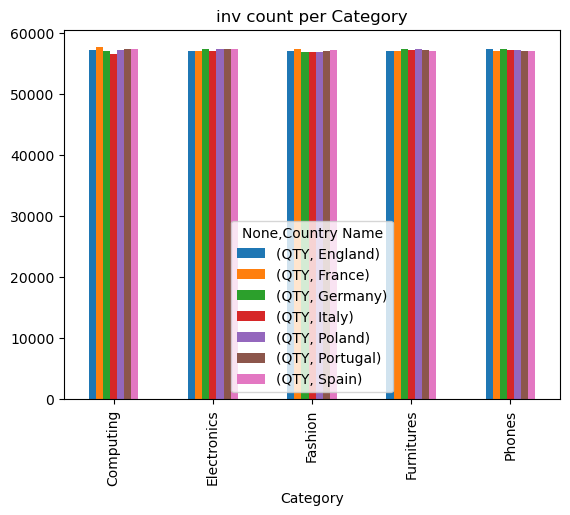

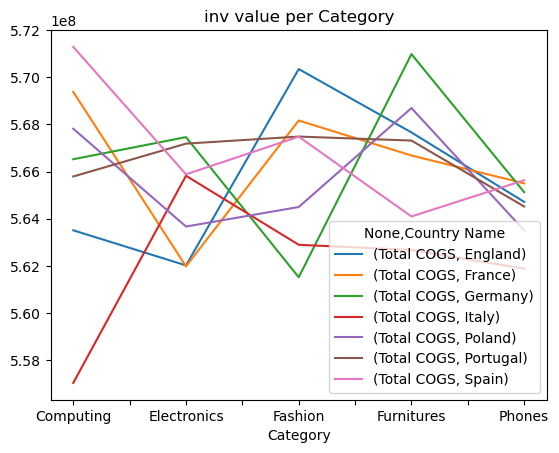

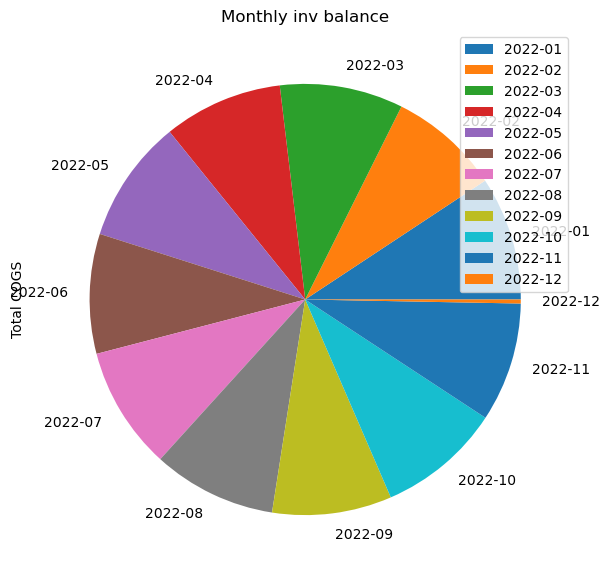

In [41]:
inventory_count.plot.bar(title='inv count per Category');
inventory_value.plot.line(title='inv value per Category');
inventory_balance.plot.pie(y='Total COGS', figsize=(7,7), layout=(3,3), title='Monthly inv balance');
plt.legend();